In [3]:
import zipfile

DATA_PATH = '/Users/jeon-yewon/Desktop/데이터 분석 강의/부트캠프/10주차/07.03./'
file_list = ['labeledTrainData.tsv.zip', 'unlabeledTrainData.tsv.zip', 'testData.tsv.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(DATA_PATH + file, 'r')
    zipRef.extractall(DATA_PATH)
    zipRef.close()

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [6]:
print(' - 파일 크기 - ')

for file in os.listdir(DATA_PATH):
    if 'tsv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_PATH + file) / 1000000, 2)) + 'MB') 

 - 파일 크기 - 
labeledTrainData.tsv          33.56MB
testData.tsv                  32.72MB
unlabeledTrainData.tsv        67.28MB


In [7]:
train_data = pd.read_csv(DATA_PATH + 'labeledTrainData.tsv', header=0, delimiter='\t', quoting=3)
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [8]:
print('학습 데이터 : ', len(train_data))

학습 데이터 :  25000


In [9]:
train_length = train_data['review'].apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

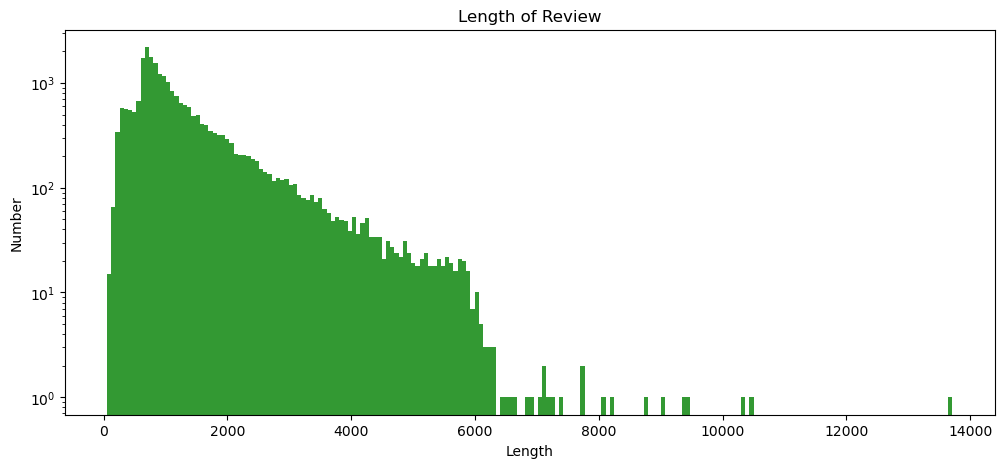

In [10]:
plt.figure(figsize=(12,5))

plt.hist(train_length, bins=200, alpha=0.8, color='g', label='word')
plt.yscale('log')

plt.xlabel('Length')
plt.ylabel('Number')
plt.title('Length of Review')
plt.show()

In [11]:
print('최대 길이 :', np.max(train_length))
print('최소 길이 :', np.min(train_length))
print('평균 길이 : {:.2f}'.format(np.mean(train_length)))
print('표준 편차 : {:.2f}'.format(np.std(train_length)))
print('중간 값  :', np.median(train_length))

최대 길이 : 13710
최소 길이 : 54
평균 길이 : 1329.71
표준 편차 : 1005.22
중간 값  : 983.0


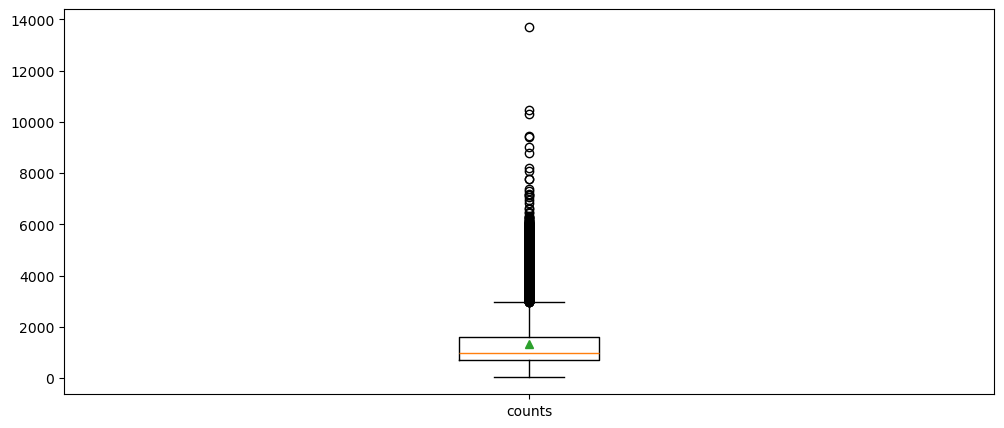

In [12]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_length, labels=['counts'], showmeans=True)
plt.show()

In [13]:
print('긍정 리뷰 :', train_data['sentiment'].value_counts()[1])
print('부정 리뷰 :', train_data['sentiment'].value_counts()[0])

긍정 리뷰 : 12500
부정 리뷰 : 12500


In [14]:
import re
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [15]:
train_data['review'][3]

'"It must be assumed that those who praised this film (\\"the greatest filmed opera ever,\\" didn\'t I read somewhere?) either don\'t care for opera, don\'t care for Wagner, or don\'t care about anything except their desire to appear Cultured. Either as a representation of Wagner\'s swan-song, or as a movie, this strikes me as an unmitigated disaster, with a leaden reading of the score matched to a tricksy, lugubrious realisation of the text.<br /><br />It\'s questionable that people with ideas as to what an opera (or, for that matter, a play, especially one by Shakespeare) is \\"about\\" should be allowed anywhere near a theatre or film studio; Syberberg, very fashionably, but without the smallest justification from Wagner\'s text, decided that Parsifal is \\"about\\" bisexual integration, so that the title character, in the latter stages, transmutes into a kind of beatnik babe, though one who continues to sing high tenor -- few if any of the actors in the film are the singers, and we

In [16]:
review = train_data['review'][3]
review_text = BeautifulSoup(review, 'html.parser').get_text()
review_text = re.sub('[^a-zA-Z]', ' ', review_text)

In [17]:
review_text

' It must be assumed that those who praised this film    the greatest filmed opera ever    didn t I read somewhere   either don t care for opera  don t care for Wagner  or don t care about anything except their desire to appear Cultured  Either as a representation of Wagner s swan song  or as a movie  this strikes me as an unmitigated disaster  with a leaden reading of the score matched to a tricksy  lugubrious realisation of the text It s questionable that people with ideas as to what an opera  or  for that matter  a play  especially one by Shakespeare  is   about   should be allowed anywhere near a theatre or film studio  Syberberg  very fashionably  but without the smallest justification from Wagner s text  decided that Parsifal is   about   bisexual integration  so that the title character  in the latter stages  transmutes into a kind of beatnik babe  though one who continues to sing high tenor    few if any of the actors in the film are the singers  and we get a double dose of Arm

In [18]:
stop_words = set(stopwords.words('english'))
review_text = review_text.lower()

words = review_text.split()
words = [w for w in words if not w in stop_words]
print(words)

['must', 'assumed', 'praised', 'film', 'greatest', 'filmed', 'opera', 'ever', 'read', 'somewhere', 'either', 'care', 'opera', 'care', 'wagner', 'care', 'anything', 'except', 'desire', 'appear', 'cultured', 'either', 'representation', 'wagner', 'swan', 'song', 'movie', 'strikes', 'unmitigated', 'disaster', 'leaden', 'reading', 'score', 'matched', 'tricksy', 'lugubrious', 'realisation', 'text', 'questionable', 'people', 'ideas', 'opera', 'matter', 'play', 'especially', 'one', 'shakespeare', 'allowed', 'anywhere', 'near', 'theatre', 'film', 'studio', 'syberberg', 'fashionably', 'without', 'smallest', 'justification', 'wagner', 'text', 'decided', 'parsifal', 'bisexual', 'integration', 'title', 'character', 'latter', 'stages', 'transmutes', 'kind', 'beatnik', 'babe', 'though', 'one', 'continues', 'sing', 'high', 'tenor', 'actors', 'film', 'singers', 'get', 'double', 'dose', 'armin', 'jordan', 'conductor', 'seen', 'face', 'heard', 'voice', 'amfortas', 'also', 'appears', 'monstrously', 'doubl

In [19]:
clean_review = ' '.join(words)
print(clean_review)

must assumed praised film greatest filmed opera ever read somewhere either care opera care wagner care anything except desire appear cultured either representation wagner swan song movie strikes unmitigated disaster leaden reading score matched tricksy lugubrious realisation text questionable people ideas opera matter play especially one shakespeare allowed anywhere near theatre film studio syberberg fashionably without smallest justification wagner text decided parsifal bisexual integration title character latter stages transmutes kind beatnik babe though one continues sing high tenor actors film singers get double dose armin jordan conductor seen face heard voice amfortas also appears monstrously double exposure kind batonzilla conductor ate monsalvat playing good friday music way transcendant loveliness nature represented scattering shopworn flaccid crocuses stuck ill laid turf expedient baffles theatre sometimes piece imperfections thoughts think syberberg splice parsifal gurnemanz

In [20]:
def preprocessing(review, remove_stopwords):
    review_text = BeautifulSoup(review, 'html.parser').get_text()
    review_text = re.sub('[^a-zA-Z]', ' ', review_text)

    words = review_text.lower().split()

    if remove_stopwords:
        stops = set(stopwords.words('english'))
        words = [w for w in words if not w in stops]

        clean_review = ' '.join(words)

    else :
        clean_review = ' '.join(words)

    return clean_review

In [21]:
clean_train_reviews = []
for review in train_data['review']:
    clean_train_reviews.append(preprocessing(review, True))

clean_train_reviews[0]

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [22]:
clean_train_df = pd.DataFrame({'review' : clean_train_reviews, 'sentiment': train_data['sentiment']})
clean_train_df.head()

,review,sentiment
0,stuff going moment mj started listening music ...,1
1,classic war worlds timothy hines entertaining ...,1
2,film starts manager nicholas bell giving welco...,0
3,must assumed praised film greatest filmed oper...,0
4,superbly trashy wondrously unpretentious explo...,1


In [23]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)

In [24]:
print(text_sequences[0])

[404, 70, 419, 8815, 506, 2456, 115, 54, 873, 516, 178, 18686, 178, 11242, 165, 78, 14, 662, 2457, 117, 92, 10, 499, 4074, 165, 22, 210, 581, 2333, 1194, 11242, 71, 4826, 71, 635, 2, 253, 70, 11, 302, 1663, 486, 1144, 3265, 8815, 411, 793, 3342, 17, 441, 600, 1500, 15, 4424, 1851, 998, 146, 342, 1442, 743, 2424, 4, 8815, 418, 70, 637, 69, 237, 94, 541, 8815, 26055, 26056, 120, 1, 8815, 323, 8, 47, 20, 323, 167, 10, 207, 633, 635, 2, 116, 291, 382, 121, 15535, 3315, 1501, 574, 734, 10013, 923, 11578, 822, 1239, 1408, 360, 8815, 221, 15, 576, 8815, 22224, 2274, 13426, 734, 10013, 27, 28606, 340, 16, 41, 18687, 1500, 388, 11243, 165, 3962, 8815, 115, 627, 499, 79, 4, 8815, 1430, 380, 2163, 114, 1919, 2503, 574, 17, 60, 100, 4875, 5100, 260, 1268, 26057, 15, 574, 493, 744, 637, 631, 3, 394, 164, 446, 114, 615, 3266, 1160, 684, 48, 1175, 224, 1, 16, 4, 8815, 3, 507, 62, 25, 16, 640, 133, 231, 95, 7426, 600, 3439, 8815, 37248, 1864, 1, 128, 342, 1442, 247, 3, 865, 16, 42, 1487, 997, 2333, 12

In [25]:
word_vocab = tokenizer.word_index
word_vocab

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'time': 6,
 'even': 7,
 'would': 8,
 'story': 9,
 'really': 10,
 'see': 11,
 'well': 12,
 'much': 13,
 'get': 14,
 'bad': 15,
 'people': 16,
 'also': 17,
 'first': 18,
 'great': 19,
 'made': 20,
 'way': 21,
 'make': 22,
 'could': 23,
 'movies': 24,
 'think': 25,
 'characters': 26,
 'character': 27,
 'watch': 28,
 'two': 29,
 'films': 30,
 'seen': 31,
 'many': 32,
 'life': 33,
 'plot': 34,
 'acting': 35,
 'never': 36,
 'love': 37,
 'little': 38,
 'best': 39,
 'show': 40,
 'know': 41,
 'ever': 42,
 'man': 43,
 'better': 44,
 'end': 45,
 'still': 46,
 'say': 47,
 'scene': 48,
 'scenes': 49,
 'go': 50,
 'something': 51,
 'back': 52,
 'real': 53,
 'watching': 54,
 'though': 55,
 'thing': 56,
 'old': 57,
 'years': 58,
 'actors': 59,
 'director': 60,
 'work': 61,
 'another': 62,
 'new': 63,
 'nothing': 64,
 'funny': 65,
 'actually': 66,
 'makes': 67,
 'look': 68,
 'find': 69,
 'going': 70,
 'part': 71,
 'lot': 72,
 'every': 73,
 'wo

In [26]:
word_vocab['<PAD>'] = 0

len(word_vocab)

74066

In [27]:
data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

In [28]:
MAX_LENGTH = 174

train_inputs = pad_sequences(text_sequences, maxlen=MAX_LENGTH, padding='post')

In [29]:
train_labels = np.array(train_data['sentiment'])
print(train_labels.shape)

(25000,)


In [30]:
print(train_inputs, train_labels)

[[  411   793  3342 ... 18689   316  1356]
 [  232   203  3048 ...     0     0     0]
 [ 1416  2366  1362 ...   700  1175  5310]
 ...
 [  117  3104    14 ...     0     0     0]
 [  639   516 16593 ...     0     0     0]
 [  109     1   350 ...     0     0     0]] [1 1 0 ... 0 0 1]


In [31]:
train_input_data = 'train_input.npy'
train_label_data = 'train_label.npy'
train_clean_data = 'train_clean.csv'
data_configs = 'data_configs.json'

import os

if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)

In [32]:
import json

np.save(open(DATA_PATH + train_input_data, 'wb'), train_inputs)
np.save(open(DATA_PATH + train_label_data, 'wb'), train_labels)

clean_train_df.to_csv(DATA_PATH + train_clean_data, index = False)

json.dump(data_configs, open(DATA_PATH + data_configs, 'w'), ensure_ascii=False)

In [33]:
test_data = pd.read_csv(DATA_PATH + 'testData.tsv', header=0, delimiter='\t', quoting=3)

clean_test_reviews = []
for review in test_data['review']:
    clean_test_reviews.append(preprocessing(review, True))

clean_test_df = pd.DataFrame({'review':clean_test_reviews, 'id' : test_data['id']})
test_id = np.array(test_data['id'])

text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
text_inputs = pad_sequences(text_sequences, maxlen=MAX_LENGTH, padding='post')

In [34]:
test_input_data = 'test_input.npy'
test_clean_data = 'test_clean.csv'
test_id_data = 'test_id.npy'

np.save(open(DATA_PATH + test_input_data, 'wb'), text_inputs)
np.save(open(DATA_PATH + test_id_data, 'wb'), test_id)
clean_test_df.to_csv(DATA_PATH + test_clean_data, index = False)

# TF-IDF

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [36]:
DATA_OUT_PATH = '/Users/jeon-yewon/Desktop/데이터 분석 강의/부트캠프/10주차/07.03./data'

train_data = pd.read_csv(DATA_PATH + train_clean_data)

In [37]:
train_data.head()

,review,sentiment
0,stuff going moment mj started listening music ...,1
1,classic war worlds timothy hines entertaining ...,1
2,film starts manager nicholas bell giving welco...,0
3,must assumed praised film greatest filmed oper...,0
4,superbly trashy wondrously unpretentious explo...,1


In [38]:
reviews = list(train_data['review'])
sentiments = list(train_data['sentiment'])

In [39]:
# min_df = 0.0 단어 최소 비율을 0, analyzer = 'char' 텍스트를 문자 단위로 분석, sublinear_tf 빈도에 로그 스케일 적용
# ngram_range=(1,3) : 1-gram, 2-gram, 3-gram 모두 생성하겠다.
vectorizer = TfidfVectorizer(min_df=0.0, analyzer='char', sublinear_tf=True, ngram_range=(1,3), max_features=5000)

X = vectorizer.fit_transform(reviews)
y = np.array(sentiments)

In [40]:
X

<25000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 17862871 stored elements in Compressed Sparse Row format>

In [41]:
vectorizer.get_feature_names_out()

array([' ', ' a', ' aa', ..., 'zzl', 'zzy', 'zzz'], dtype=object)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
lgs = LogisticRegression(class_weight='balanced')
lgs.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [44]:
predicted = lgs.predict(X_test)

In [45]:
print('Acc : ', lgs.score(X_test, y_test))

Acc :  0.8602


In [46]:
test_data = pd.read_csv(DATA_PATH + test_clean_data)

In [47]:
testDataVecs = vectorizer.transform(test_data['review'])
test_predicted = lgs.predict(testDataVecs)
print(test_predicted)

[1 0 1 ... 0 1 0]


# Word2Vec

In [48]:
sentences = []
for review in reviews:
    sentences.append(review.split())

In [49]:
from gensim.models import word2vec

# sample - 다운 샘플링 (단어 빈도가 높을 수록 다운샘플링할 확률 높인다.) 'the', 'and' 이러한 단어들이 모델에 영향을 줄인다.
model = word2vec.Word2Vec(sentences, workers=4, vector_size=300, min_count = 40, window=10, sample = 1e-3) # 1e-3 = 0.001 -> 0.1% 비율

In [50]:
def get_features(words, model, num_features):
    feature_vector = np.zeros((num_features), dtype=np.float32) # 벡터를 저장할 배열
    num_words = 0 # 단어 수
    index2word_set = set(model.wv.index_to_key) # 사전을 set으로 변환하여 검색 속도를 높임.

    for w in words:
        if w in index2word_set: # 단어가 사전에 포함되어 있는지
            num_words += 1
            feature_vector = np.add(feature_vector, model.wv[w])

    if num_words != 0:
        feature_vector = np.divide(feature_vector, num_words)

    return feature_vector

In [51]:
def get_dataset(reviews, model, num_features):
    dataset = list() # 리뷰의 벡터를 저장할 리스트

    for s in reviews:
        dataset.append(get_features(s, model, num_features)) # 각 리뷰들의 벡터화

    reviewFeatureVecs = np.stack(dataset) # 넘파이 배열로 변환

    return reviewFeatureVecs

In [52]:
test_data_vecs = get_dataset(sentences, model, 300)

In [53]:
test_data_vecs

array([[ 0.1592406 ,  0.18841289, -0.08710857, ...,  0.02826095,
        -0.11065888, -0.04896371],
       [ 0.12428326,  0.03750901, -0.20870957, ...,  0.06262323,
         0.2084936 , -0.09747046],
       [-0.03936535,  0.12649743, -0.04108667, ..., -0.2607113 ,
         0.09712675, -0.08771789],
       ...,
       [ 0.03664446,  0.1472725 , -0.11267789, ...,  0.33888698,
        -0.07322291,  0.11159049],
       [ 0.10458744,  0.3127873 , -0.04767978, ..., -0.01044916,
         0.1926804 , -0.04180554],
       [-0.04808972,  0.14342636, -0.05893698, ..., -0.01839085,
         0.19150488, -0.05239358]], dtype=float32)

In [54]:
X = test_data_vecs
y = np.array(sentiments)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
lgs = LogisticRegression(class_weight = 'balanced')
lgs.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [57]:
print('Acc : ', lgs.score(X_test, y_test))

Acc :  0.8672


In [58]:
test_review = list(test_data['review'])
test_sentences = list()

for review in test_review:
    test_sentences.append(review.split())

In [59]:
test_data_vecs = get_dataset(test_sentences, model, 300)
test_data_vecs

array([[-0.12944634,  0.26016665, -0.1294589 , ..., -0.29968283,
         0.10770783,  0.06893946],
       [ 0.07903659,  0.17447731, -0.14545658, ...,  0.17047493,
        -0.21546543,  0.02108958],
       [ 0.07403336,  0.11036979, -0.18872915, ...,  0.07187644,
        -0.09421607,  0.01644285],
       ...,
       [-0.05044726,  0.17728953,  0.0405955 , ...,  0.09478398,
         0.10714611,  0.03955509],
       [-0.02526771,  0.08558398, -0.00447413, ..., -0.23008423,
         0.18634549,  0.04690735],
       [ 0.18419518,  0.09947196,  0.02549832, ..., -0.1145292 ,
        -0.03348696, -0.08196568]], dtype=float32)

In [60]:
test_predicted = lgs.predict(test_data_vecs)
test_predicted

array([1, 0, 1, ..., 0, 1, 1])

In [61]:
model.save('word2vec')